In [88]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 


## data load

In [89]:
X=pd.read_csv('q3/logisticX.csv',header=None)
Y=pd.read_csv('q3/logisticY.csv',header=None)

In [90]:
X.head(),Y.head()

(        0       1
 0  3.8915  4.2105
 1  3.6898  6.6051
 2  2.7763  7.5057
 3  3.1137  5.7724
 4  2.9251  5.4315,
    0
 0  0
 1  0
 2  0
 3  0
 4  0)

## normalize

In [91]:
X[0]-=np.mean(X[0])
X[0]/=np.var(X[0])

X[1]-=np.mean(X[1])
X[1]/=np.var(X[1])
X=X.to_numpy()

In [92]:
X=np.hstack((np.ones_like(X[:,0]).reshape(-1,1),X))
X[:,0]-=np.mean(X[:,0])
Y=Y.to_numpy().reshape(-1,1)

## plot data

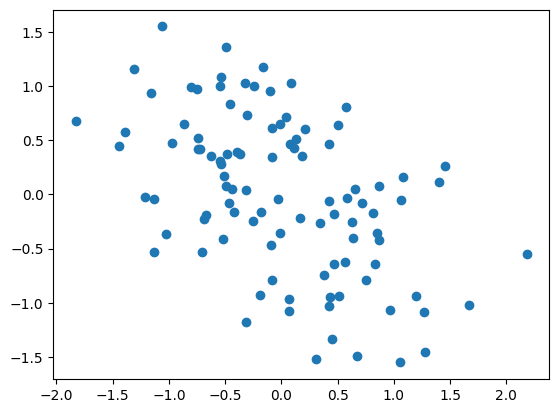

In [93]:
plt.scatter(X[:,1].flatten(),X[:,2].flatten())

# train using simple GD

In [94]:
theta=np.zeros((1,3))
def hypothesis(X,theta):
    z=np.dot(X,theta.T)
    return  1/(1 + np.exp(-z))

In [95]:
alpha =0.01
for epoch in range(10000):
    theta=theta+alpha*np.dot((Y-hypothesis(X,theta)).T,X)
theta

array([[ 0.        ,  3.18428692, -3.56408654]])

In [99]:
positive_samples = X[Y.flatten() == 1]
negative_samples = X[Y.flatten() == 0]

line_x = np.linspace(np.min(X[:,1]), np.max(X[:,1]), 20)
line_y = -(theta[0,0] + theta[0,1]*line_x) / theta[0,2]


# line=np.array([X[:,1].reshape(-1,1),-(1/theta[:,2][0])*(0*theta[:,0] +X[:,1].reshape(-1,1)*theta[:,1][0])])

In [100]:
# line=line.squeeze().T

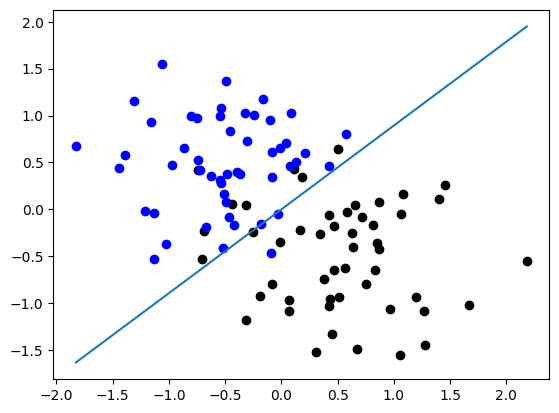

In [101]:

# ax=plt.axes(projection='2d')
plt.scatter(positive_samples[:,1],positive_samples[:,2],color='black')
plt.scatter(negative_samples[:,1],negative_samples[:,2],color='blue')
plt.plot(line_x.flatten(),line_y)
plt.show()



## Newton’s method for optimizing L(θ)

In [128]:
# compute Hessian matrix
import numpy as np

def logistic_regression_newton(X, y, num_iters=10): 
    # Initialize theta
    theta = np.zeros((X.shape[1], 1))
    
    for i in range(num_iters):
        
        # Calculate the gradient and Hessian matrix
        z = np.dot(X, theta)
        h = sigmoid(z) * (1 - sigmoid(z))
                # Calculate the gradient of L(θ)
        grad = np.dot(X.T, (sigmoid(np.dot(X, theta)) - y))

        # Calculate the Hessian matrix of L(θ)
        H = np.dot(X.T, np.dot(np.diagflat(sigmoid(np.dot(X, theta)) * (1 - sigmoid(np.dot(X, theta)))), X))
        
        # Handle the case of a singular Hessian matrix
        try:
            # Calculate the update direction
            d = -np.dot(np.linalg.inv(H), grad)
        except np.linalg.LinAlgError:
            H += 0.1 * np.eye(X.shape[1])
            d = -np.dot(np.linalg.inv(H), grad)
        
        # Update theta
        theta += d
    
    return theta


def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [133]:
theta= logistic_regression_newton(X,Y).reshape(1,-1)
theta

array([[ 0.        ,  3.18428685, -3.56408642]])

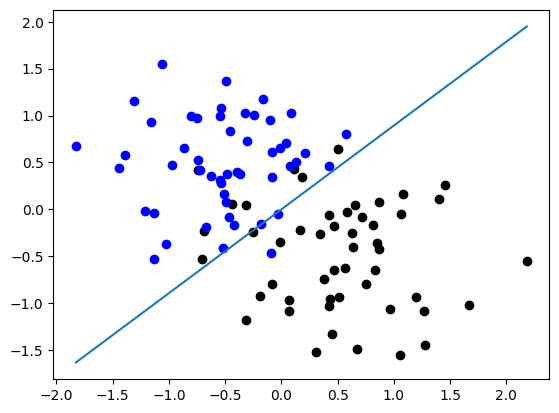

In [132]:
line_x = np.linspace(np.min(X[:,1]), np.max(X[:,1]), 20)
line_y = -(theta[0,0] + theta[0,1]*line_x) / theta[0,2]


# ax=plt.axes(projection='2d')
plt.scatter(positive_samples[:,1],positive_samples[:,2],color='black')
plt.scatter(negative_samples[:,1],negative_samples[:,2],color='blue')
plt.plot(line_x.flatten(),line_y)
plt.show()

